# USGS dataretrieval Python Package `get_dv()` Examples

This notebook provides examples of using the Python dataretrieval package to retrieve daily streamflow data for a United States Geological Survey (USGS) monitoring site. The dataretrieval package provides a collection of functions to get data from the USGS National Water Information System (NWIS) and other online sources of hydrology and water quality data, including the United States Environmental Protection Agency (USEPA).

### Install the Package

Use the following code to install the package if it doesn't exist already within your Jupyter Python environment.

In [ ]:
#!pip install dataretrieval/n#or for an Anaconda install from an Anaconda Prompt/n#conda install conda-forge::dataretrieval

Load the package so you can use it along with other packages used in this notebook.

In [1]:
from dataretrieval import nwis
from IPython.display import display

### Basic Usage

The dataretrieval package has several functions that allow you to retrieve data from different web services. This examples uses the `get_dv()` function to retrieve daily streamflow data for a USGS monitoring site from NWIS. The following arguments are supported:

Arguments (Additional arguments, if supplied, will be used as query parameters)

* **sites** (string or list of strings): A list of USGS site identifiers for which to retrieve data.
* **parameterCd** (list of strings): A list of USGS parameter codes for which to retrieve data.
* **statCd** (list of strings): A list of USGS statistic codes for which to retrieve data.
* **start** (string): The beginning date for a period for which to retrieve data. If the waterdata parameter startDT is supplied, it will overwrite the start parameter.
* **end** (string): The ending date for a period for which to retrieve data. If the waterdata parameter endDT is supplied, it will overwrite the end parameter.

Example 1: Get daily value data for a specific parameter at a single USGS NWIS monitoring site between a begin and end date.

In [2]:
# Set the parameters needed to retrieve data
siteNumber = "10109000" # LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT
parameterCode = "00060" # Discharge
startDate = "2020-10-01"
endDate = "2021-09-30"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")

Retrieved 1 data values.


### Interpreting the Result

The result of calling the `get_dv()` function is an object that contains a Pandas data frame object and an associated metadata object. The Pandas data frame contains the daily values for the observed variable and time period requested. The data frame is indexed by the dates associated with the data values.

Once you've got the data frame, there's several useful things you can do to explore the data.

In [3]:
# Display the data frame as a table
display(dailyStreamflow[0])

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2022-01-27 00:00:00+00:00,63.6,P,10109000


Show the data types of the columns in the resulting data frame.

In [4]:
print(dailyStreamflow[0].dtypes)

00060_Mean       float64
00060_Mean_cd     object
site_no           object
dtype: object


Get summary statistics for the daily streamflow values.

In [5]:
dailyStreamflow[0].describe()

,00060_Mean
count,1.0
mean,63.6
std,NaN
min,63.6
25%,63.6
50%,63.6
75%,63.6
max,63.6


Make a quick time series plot.

Text(0, 0.5, 'Streamflow (cfs)')

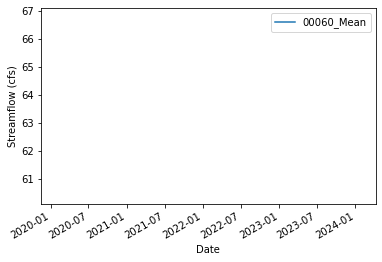

In [6]:
ax = dailyStreamflow[0].plot(y='00060_Mean')
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

The other part of the result returned from the `get_dv()` function is a metadata object that contains information about the query that was executed to return the data. For example, you can access the URL that was assembled to retrieve the requested data from the USGS web service. The USGS web service responses contain a descriptive header that defines and can be helpful in interpreting the contents of the response.

In [ ]:
print("The query URL used to retrieve the data from NWIS was: " + dailyStreamflow[1].url)

### Additional Examples

Example 2: Get daily mean and max discharge and temperature values for a site between a begin and end date.

Parameter Code: 00010 = temperature, 00060 = discharge
See https://help.waterdata.usgs.gov/codes-and-parameters/parameters

Statistic Code: 00001 = Maximum, 00003 = Mean
See https://help.waterdata.usgs.gov/stat_code

NOTE: There's not full overlap in the availability of data for temperature and discharge for both statistics at this site. When data for one statistic is not available, a "NaN" value is returned in the data frame.

In [ ]:
siteID = "04085427"
dailyQAndT = nwis.get_dv(sites=siteID, parameterCd=["00010", "00060"],
                         start=startDate, end=endDate,
                         statCd=["00001", "00003"])
display(dailyQAndT[0])

Example 3: Get daily mean and max discharge and temperature values for multiple sites between a begin and end date

In [ ]:
dailyMultiSites = nwis.get_dv(sites=["01491000", "01645000"], parameterCd=["00010", "00060"],
                              start="2012-01-01", end="2012-06-30", statCd=["00001","00003"])
display(dailyMultiSites[0])

Example 4: Test for a site that is not active - returns an empty DataFrame.

In [ ]:
siteID = "05212700"
notActive = nwis.get_dv(sites=siteID, parameterCd="00060", start="2014-01-01", end="2014-01-07")
display(notActive[0])